In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [31]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

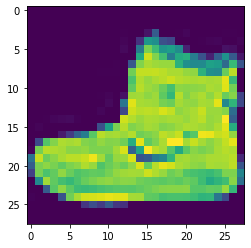

In [62]:
plt.imshow(x_train[0])

In [32]:
x_train = x_train.reshape(60000,28,28,1)/255.0
x_test = x_test.reshape(10000,28,28,1)/255.0

In [37]:
optimizer = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )

In [38]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters= 16, kernel_size= 3, input_shape= [28, 28, 1], activation= 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size= [2, 2]))
model.add(tf.keras.layers.Conv2D(filters= 32, kernel_size= 3, activation= 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size= [2, 2]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units= 128, activation= 'relu'))
model.add(tf.keras.layers.Dense(units= 128, activation= 'relu'))
model.add(tf.keras.layers.Dense(units= 10, activation= 'softmax'))

In [39]:
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [40]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.4731 - accuracy: 0.8279
Epoch 2/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.3146 - accuracy: 0.8852
Epoch 3/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2684 - accuracy: 0.90140s - loss: 0.2684 - accuracy: 0.90
Epoch 4/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.2383 - accuracy: 0.9112
Epoch 5/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2137 - accuracy: 0.92050s - loss: 0.213
Epoch 6/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1937 - accuracy: 0.9273
Epoch 7/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1749 - accuracy: 0.9344
Epoch 8/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1618 - accuracy: 0.9391
Epoch 9/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1445 - accuracy: 0.9449
Epoch 10/10
18

In [41]:
loss, accuracy = model.evaluate(x_test, y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 3s 9ms/step - loss: 0.2793 - accuracy: 0.9080
0.2793295681476593
0.9079999923706055


In [42]:
model.save('fasion_mnist.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: fasion_mnist.model\assets


In [59]:
stuff = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]


The result is probably: Sandal


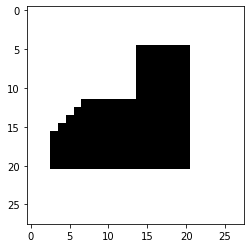

The result is probably: Trouser


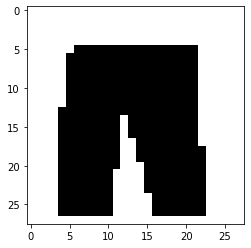

The result is probably: T-shirt/top


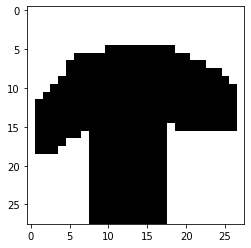

The result is probably: Bag


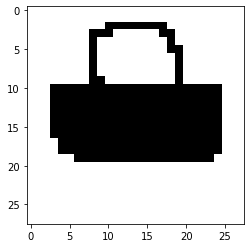

In [67]:
for x in range(1,5):
    img = cv.imread(f'{x}.png')[:,:,0]
    img = np.invert(np.array([img])) #in next step, instead of white over black, we get black over white
    img = img.reshape([1,28,28,1])
    prediction = model.predict(img)
    print(f'The result is probably: {stuff[np.argmax(prediction)]}')
    plt.imshow(img[0],cmap=plt.cm.binary) #white over black bg
    plt.show()
    